## 사용 라이브러리

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# 한글폰트 사용을 위한 코드
from matplotlib import rc, font_manager
%matplotlib inline

# 한글폰트 사용을 위한 코드
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_excel("./commerce.xlsx", encoding="cp949")

In [7]:
df_shipping = df.copy()

## 📌 테이블 정의서
#### 기본 정보
* 테이블명 : 일자별 행정동별 카테고리별 물류 건수
* 테이블 개요 : [적재주기:일단위] 기준지역 내 일자별 카테고리별 물류 건수

#### 특기사항
* 기간 : 19년 2월 1일 - 19년 5월 31일, 20년 2월 1일~20년 5월 31일
* 지역 : 대구(수성구, 중구), 서울(노원구, 중구) 내 전 행정동
* 카테고리별(대분류기준) 송장 건수


## 데이터 전처리 _ 날짜변경

In [8]:
df_shipping.rename(columns={"DL_YMD":"배송년월일"}, inplace=True)
df_shipping.rename(columns={"DL_GD_LCLS_NM":"배송상품대분류명"}, inplace=True)
df_shipping.rename(columns={"DL_GD_LCLS_CD":"배송상품대분류코드"}, inplace=True)
df_shipping.rename(columns={"CTPV_NM":"시도명"}, inplace=True)
df_shipping.rename(columns={"CTPV_CD":"시도코드"}, inplace=True)
df_shipping.rename(columns={"CTGG_NM":"시군구명"}, inplace=True)
df_shipping.rename(columns={"CTGG_CD":"시군구코드"}, inplace=True)
df_shipping.rename(columns={"HDNG_NM":"행정동명"}, inplace=True)
df_shipping.rename(columns={"HDNG_CD":"행정동코드"}, inplace=True)
df_shipping.rename(columns={"INVC_CONT":"송장건수"}, inplace=True)

In [9]:
df_shipping.head()

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21


In [10]:
df_shipping['배송날짜'] = df_shipping['배송년월일'] +20000000

In [11]:
df_shipping.head()

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,20190201
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,20190201
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,20190201
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,20190201
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,20190201


In [12]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   배송년월일      156571 non-null  int64 
 1   배송상품대분류명   156571 non-null  object
 2   배송상품대분류코드  156571 non-null  int64 
 3   시도명        156571 non-null  object
 4   시도코드       156571 non-null  int64 
 5   시군구명       156571 non-null  object
 6   시군구코드      156571 non-null  int64 
 7   행정동명       156571 non-null  object
 8   행정동코드      156571 non-null  int64 
 9   송장건수       156571 non-null  int64 
 10  배송날짜       156571 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 13.1+ MB


In [13]:
df_shipping['배송날짜'] = pd.to_datetime(df_shipping['배송날짜'], format='%Y%m%d')

In [14]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   배송년월일      156571 non-null  int64         
 1   배송상품대분류명   156571 non-null  object        
 2   배송상품대분류코드  156571 non-null  int64         
 3   시도명        156571 non-null  object        
 4   시도코드       156571 non-null  int64         
 5   시군구명       156571 non-null  object        
 6   시군구코드      156571 non-null  int64         
 7   행정동명       156571 non-null  object        
 8   행정동코드      156571 non-null  int64         
 9   송장건수       156571 non-null  int64         
 10  배송날짜       156571 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 13.1+ MB


In [15]:
df_shipping

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,2019-02-01
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,2019-02-01
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,2019-02-01
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,2019-02-01
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,2019-02-01
...,...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22,2020-05-31
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21,2020-05-31
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14,2020-05-31
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25,2020-05-31


In [16]:
df_shipping['배송연도']=pd.DatetimeIndex(df_shipping['배송날짜']).year
df_shipping

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜,배송연도
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,2019-02-01,2019
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,2019-02-01,2019
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,2019-02-01,2019
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,2019-02-01,2019
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,2019-02-01,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22,2020-05-31,2020
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21,2020-05-31,2020
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14,2020-05-31,2020
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25,2020-05-31,2020


In [17]:
shipping_2019=df_shipping[df_shipping.배송날짜<'2020']

In [18]:
shipping_2019['배송날짜']=shipping_2019['배송날짜'].apply(lambda x: x.strftime('%m-%d'))
shipping_2019

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜,배송연도
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,02-01,2019
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,02-01,2019
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,02-01,2019
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,02-01,2019
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,02-01,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
76887,190531,패션잡화,20,서울특별시,11,중구,14,청구동,645,55,05-31,2019
76888,190531,화장품/미용,21,대구광역시,27,수성구,26,범어2동,520,120,05-31,2019
76889,190531,화장품/미용,21,서울특별시,11,중구,14,다산동,625,74,05-31,2019
76890,190531,패션의류,19,대구광역시,27,중구,11,대신동,595,150,05-31,2019


In [19]:
shipping_2020=df_shipping[df_shipping.배송날짜>'2019']

In [20]:
shipping_2020['배송날짜']=shipping_2020['배송날짜'].apply(lambda x: x.strftime('%m-%d'))

In [21]:
shipping_2020

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜,배송연도
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,02-01,2019
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,02-01,2019
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,02-01,2019
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,02-01,2019
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,02-01,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22,05-31,2020
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21,05-31,2020
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14,05-31,2020
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25,05-31,2020


In [22]:
p = shipping_2020[shipping_2020.배송연도==2019]
p

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜,배송연도
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,02-01,2019
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,02-01,2019
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,02-01,2019
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,02-01,2019
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,02-01,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
76887,190531,패션잡화,20,서울특별시,11,중구,14,청구동,645,55,05-31,2019
76888,190531,화장품/미용,21,대구광역시,27,수성구,26,범어2동,520,120,05-31,2019
76889,190531,화장품/미용,21,서울특별시,11,중구,14,다산동,625,74,05-31,2019
76890,190531,패션의류,19,대구광역시,27,중구,11,대신동,595,150,05-31,2019


In [23]:
shipping_2020 = shipping_2020.loc[76892:]

In [24]:
shipping_2020

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수,배송날짜,배송연도
76892,200201,가구/인테리어,10,대구광역시,27,수성구,26,범어3동,530,3,02-01,2020
76893,200201,도서/음반,12,서울특별시,11,노원구,35,월계1동,560,24,02-01,2020
76894,200201,가구/인테리어,10,대구광역시,27,수성구,26,범물2동,662,3,02-01,2020
76895,200201,가구/인테리어,10,서울특별시,11,노원구,35,상계3.4동,665,4,02-01,2020
76896,200201,도서/음반,12,대구광역시,27,수성구,26,수성1가동,570,34,02-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22,05-31,2020
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21,05-31,2020
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14,05-31,2020
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25,05-31,2020


# 2월~5월 전국 송장건수 전년대비 비교 

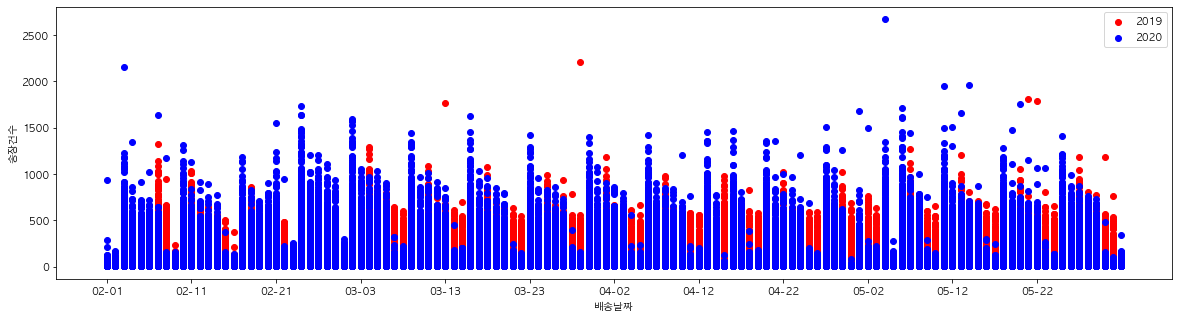

In [38]:
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(shipping_2019["배송날짜"], shipping_2019["송장건수"],
color="red", label="2019") 
ax.scatter(shipping_2020["배송날짜"], shipping_2020["송장건수"],
color="blue", label="2020") 

ax.legend()
ax.set_xlabel("배송날짜") 
ax.set_ylabel("송장건수")
plt.xticks(np.arange(min(x), max(x)+100, 10.0))
plt.show()
      